# 6 April 2019 Overview

In [1]:
from mgl_efis_plotter import *
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 9]

In [3]:
datafile = 'IEFIS.REC'

flights = create_flights(datafile, Config())
for i in range(0, len(flights)):
    print(i, flights[i])
f = flights[0]
p = Plot(f)

0 Flight at 2019-04-06 12:11:23 to 2019-04-06 13:53:17,   29,244 messages
1 Flight at 2019-04-06 12:11:21 to 2019-04-06 12:11:21,   7 messages


In [4]:
#p.plot2(['rpm', 'manifoldPressure', 'fuelFlow'], xlim=(18, 48), ylim=(2300, 2500)).show()

In [5]:
ff_data = f.list_data('fuelFlow')
ff = pd.DataFrame(ff_data, index=ff_data['minutes'], columns=['fuelFlow'])

In [6]:
efis_ff = ff.loc[18:48].mean()
efis_ff

fuelFlow    29.801191
dtype: float64

In [7]:
actual_ff = 12.2
correction = float(actual_ff / efis_ff)
correction

0.40937961188372235

## Scale the Fuel Flow Numbers

In [8]:
ff['fuelFlow'] = ff['fuelFlow'] * correction

In [9]:
ff75 = ff.loc[18:48].mean()
ff65 = ff.loc[56:69].mean()
print('fuel flow @ 75% =', float(ff75))
print('fuel flow @ 65% =', float(ff65))


fuel flow @ 75% = 12.200000000000001
fuel flow @ 65% = 8.812755745129136


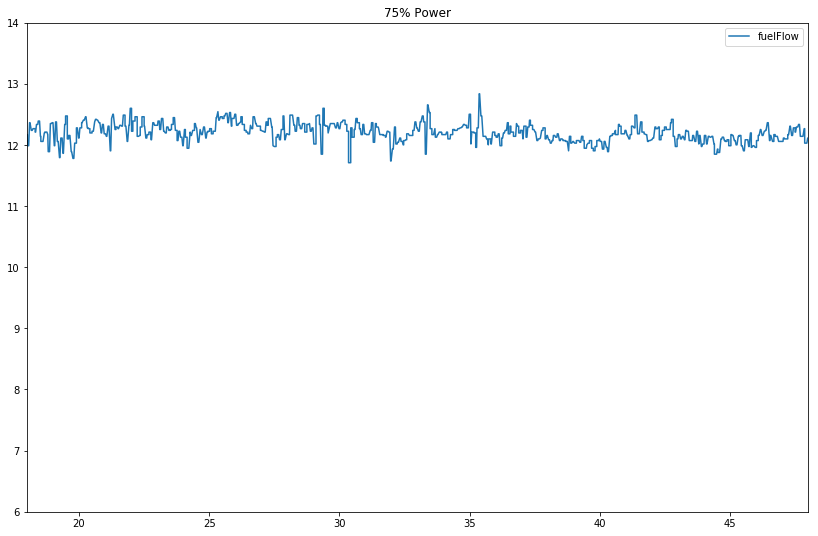

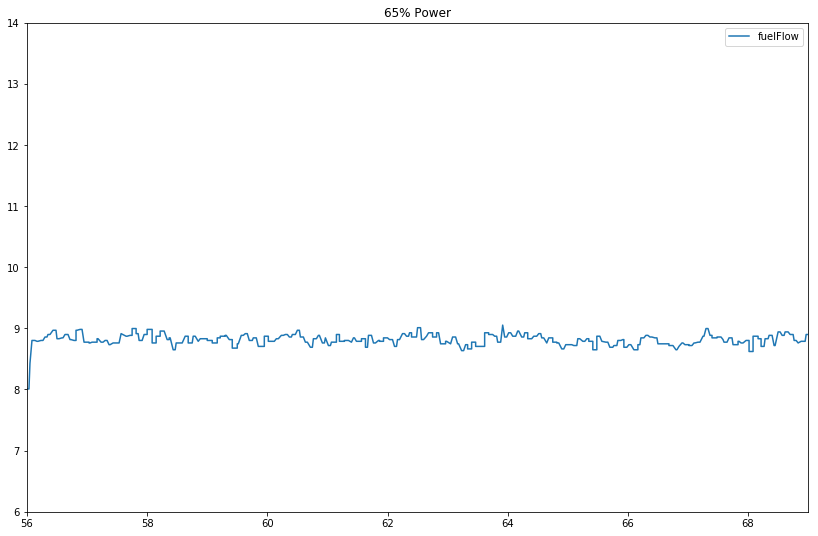

In [10]:
ff.plot(xlim=(18, 48), ylim=(6, 14), title='75% Power')
ff.plot(xlim=(56, 69), ylim=(6, 14), title='65% Power')